# Spectrogram Recreation
In this notebook I will be recreating the spectrogram from an earlier paper

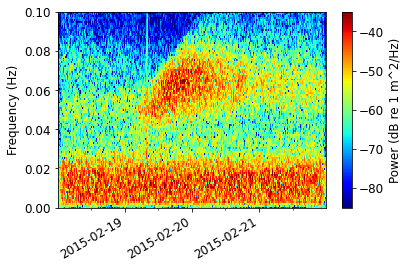

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mplt
import matplotlib.dates as mdates
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client
import obspy
import datetime
import numpy as np

plt.rcParams.update({'font.size': 12})

# Variables
client = Client("IRIS")
net = 'XH'
sta = 'DR02'
loc = '--'
chan = 'LHZ'
starttime = UTCDateTime('2015-02-18T00:00:00') 
endtime = UTCDateTime('2015-02-22T00:00:00')

# Load data
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response=True)

# Filter the data and get data/times variables
st_filt = st.copy()

# Remove response
st_filt_rem = st_filt.copy()
st_filt_rem = st_filt_rem.remove_response(output="DISP", plot=False)

sample_rate = 1.0
data = st_filt_rem[0].data

# Get power
plt.figure()
power, freqs, times, im = plt.specgram(data, Fs = sample_rate, NFFT=1024, mode='psd', scale='dB', scale_by_freq=True) 
plt.close()

power = 10*np.log10(power)

# Create a spectrogram
# Note: Scale by frequency plots dB/Hz as opposed to dB, but the power = 20*log(amplitude/reference/frequency) instead of 20*log(amplitude/reference)
fig = plt.figure()
ax = plt.gca()

# Convert times array from seconds to python datetime object
time_values = []
for i in(range(len(times))):
    time = UTCDateTime(starttime + times[i]).datetime
    time_values.append(time)

# Plot
im = plt.pcolormesh(time_values, freqs, power, shading='auto', cmap='jet', vmin=-85, vmax=-35)
plt.ylim(0, 0.1)
plt.ylabel("Frequency (Hz)")

# Add colorbar depending on type passed in
cbar = plt.colorbar(im)
cbar.set_label("Power (dB re 1 m^2/Hz)")
im.set_clim(vmin=-85, vmax=-35)

# Format Time Axes
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=12))
fig.autofmt_xdate()

# Save
plt.savefig("chen2018_spectrogram.jpg")

plt.show()